In [18]:
import librosa 
import numpy as np
import pandas as pd
import os

max = 0

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#         print(mfccs.shape) # 이거 추가해봄
        mfccsscaled = np.mean(mfccs.T,axis=0)
        global max
        if mfccs.shape[1] > max:
            max = mfccs.shape[1]
#             print(max)

    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccsscaled
    
    
# 데이터셋 path 지정
fulldatasetpath1 = 'all_data/data'
fulldatasetpath2 = 'all_data/kg_data'

metadata1 = pd.read_csv('all_data/UrbanSound8K.csv')
metadata2 = pd.read_csv('all_data/train_post_competition.csv')
metadata3 = pd.read_csv('all_data/test_post_competition_scoring_clips.csv')

features = []

# 각 소리에 대해 feature를 추출
for index, row in metadata1.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath1)+'/'+str(row["slice_file_name"]))
    
    if(row["class"]=='dog_bark' or row["class"]=='car_horn' or row["class"]=='gun_shot' or row["class"]=='siren'):
        class_label = row["class"]
        data = extract_features(file_name)
        
    else:
        continue
        
    features.append([data, class_label])
    
# 각 소리에 대해 feature를 추출
for index, row in metadata2.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath2)+'/'+str(row["fname"]))
    
    if(row["label"]=='Squeak' or row["label"]=='Gunshot_or_gunfire' or row["label"]=='Meow' or row["label"]=='Knock'):
        if(row["label"]=='Gunshot_or_gunfire'):
            class_label = 'gun_shot'
            data = extract_features(file_name)
        else:
            class_label = row["label"]
            data = extract_features(file_name)
        
    else:
        continue
        
    features.append([data, class_label])
    
# 각 소리에 대해 feature를 추출
for index, row in metadata3.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath2)+'/'+str(row["fname"]))
    
    if(row["label"]=='Squeak' or row["label"]=='Gunshot_or_gunfire' or row["label"]=='Meow' or row["label"]=='Knock'):
        if(row["label"]=='Gunshot_or_gunfire'):
            class_label = 'gun_shot'
            data = extract_features(file_name)
        else:
            class_label = row["label"]
            data = extract_features(file_name)
        
    else:
        continue
        
    features.append([data, class_label])

    

featuresdf = pd.DataFrame(features, columns=['feature','class'])

print('Finished feature extraction from ', len(featuresdf), ' files') 
print('Max :',max)

/Users/itaemin/opt/anaconda3/envs/py38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
/Users/itaemin/opt/anaconda3/envs/py38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/Users/itaemin/opt/anaconda3/envs/py38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


Finished feature extraction from  3773  files
Max : 1287


In [70]:
print(metadata1['class'].value_counts())
print(metadata2['label'].value_counts())
print(metadata3['label'].value_counts())

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64
Hi-hat                   300
Laughter                 300
Shatter                  300
Applause                 300
Squeak                   300
Acoustic_guitar          300
Bass_drum                300
Saxophone                300
Flute                    300
Double_bass              300
Tearing                  300
Fart                     300
Clarinet                 300
Fireworks                300
Trumpet                  300
Violin_or_fiddle         300
Cello                    300
Snare_drum               300
Oboe                     299
Gong                     292
Knock                    279
Writing                  270
Cough                    243
Bark                     239
Tambourine               221

In [71]:
print(featuresdf['class'])

0       dog_bark
1       car_horn
2       car_horn
3       car_horn
4       car_horn
          ...   
3768      Squeak
3769    gun_shot
3770       Knock
3771    gun_shot
3772        Meow
Name: class, Length: 3773, dtype: object


In [53]:
featuresdf.to_csv('alldata.csv',index=False)

In [72]:
df = pd.read_csv('alldata1.csv')

In [73]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot

0.9.1


In [74]:
data = df.values
y = data[:, -1]

In [75]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%s, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()
    
    return v

In [76]:
X, y = data[:, :-1], data[:, -1]

In [77]:
print(y)

['car_horn' 'car_horn' 'car_horn' ... 'Knock' 'gun_shot' 'Meow']


Class=car_horn, n=401 (16.468%)
Class=gun_shot, n=401 (16.468%)
Class=siren, n=401 (16.468%)
Class=dog_bark, n=401 (16.468%)
Class=Knock, n=318 (13.060%)
Class=Squeak, n=329 (13.511%)
Class=Meow, n=184 (7.556%)


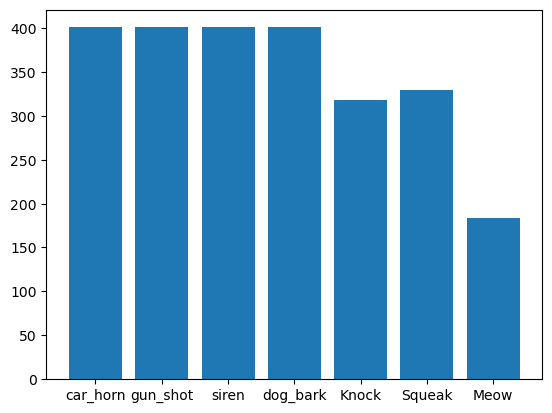

184

In [78]:
count_and_plot(y)

In [51]:
dog=1
car=1
gun=1
siren=1
for idx, class_name in enumerate(df['class']):
    if(class_name=='dog_bark'):
        if(dog==600):
            continue
        else:
            df = df.drop(idx, axis=0)
            dog=dog+1
        
    elif(class_name=='gun_shot'):
        if(gun==184):
            continue
        else:
            df = df.drop(idx, axis=0)
            gun=gun+1
        
    elif(class_name=='car_horn'):
        if(car==29):
            continue
        else:
            df = df.drop(idx, axis=0)
            car=car+1
        
    elif(class_name=='siren'):
        if(siren==529):
            continue
        else:
            df = df.drop(idx, axis=0)
            siren=siren+1
        

    

In [79]:
df

,feature,class
0,[-4.9433600e+02 1.0005242e+02 -3.4796898e+01 ...,car_horn
1,[-4.18100006e+02 9.58975296e+01 -5.44968414e+...,car_horn
2,[-4.9005728e+02 9.6375824e+01 -2.8977787e+01 ...,car_horn
3,[-4.6696677e+02 1.0435973e+02 -2.4942659e+01 ...,car_horn
4,[-304.23962 99.12256 -55.563942 13.6...,car_horn
...,...,...
2430,[-345.5894 2.3189092 -49.00343 -1.7...,Squeak
2431,[-3.0354901e+02 1.1753219e+02 -3.3921969e+00 ...,gun_shot
2432,[-3.2310422e+02 2.1461627e+02 5.6969116e+01 ...,Knock
2433,[-2.1582791e+02 7.9793129e+01 -9.1993170e+00 ...,gun_shot


In [38]:
df.to_csv('alldata1.csv',index=False)

In [80]:
Counter(y)['dog_bark']

401

In [81]:
# extract feature 함수 재정의
import numpy as np
max_pad_len = 1287
test_num = 0

def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc = 40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width = ((0, 0), (0, pad_width)), mode = 'constant')
    
    except Exception as e:
        print("Error 발생: ", file_name)
        return None
    
    return mfccs

In [67]:
import os

# 데이터셋 path 지정
fulldatasetpath1 = 'all_data/data'
fulldatasetpath2 = 'all_data/kg_data'

metadata1 = pd.read_csv('all_data/UrbanSound8K.csv')
metadata2 = pd.read_csv('all_data/train_post_competition.csv')
metadata3 = pd.read_csv('all_data/test_post_competition_scoring_clips.csv')

features = []

# 각 소리에 대해 feature를 추출
for index, row in metadata1.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath1)+'/'+str(row["slice_file_name"]))
    
    if(row["class"]=='dog_bark' or row["class"]=='car_horn' or row["class"]=='gun_shot' or row["class"]=='siren'):
        class_label = row["class"]
        data = extract_features(file_name)
        
    else:
        continue
        
    features.append([data, class_label])
    
# 각 소리에 대해 feature를 추출
for index, row in metadata2.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath2)+'/'+str(row["fname"]))
    
    if(row["label"]=='Squeak' or row["label"]=='Gunshot_or_gunfire' or row["label"]=='Meow' or row["label"]=='Knock'):
        if(row["label"]=='Gunshot_or_gunfire'):
            class_label = 'gun_shot'
            data = extract_features(file_name)
        else:
            class_label = row["label"]
            data = extract_features(file_name)
        
    else:
        continue
        
    features.append([data, class_label])
    
# 각 소리에 대해 feature를 추출
for index, row in metadata3.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath2)+'/'+str(row["fname"]))
    
    if(row["label"]=='Squeak' or row["label"]=='Gunshot_or_gunfire' or row["label"]=='Meow' or row["label"]=='Knock'):
        if(row["label"]=='Gunshot_or_gunfire'):
            class_label = 'gun_shot'
            data = extract_features(file_name)
        else:
            class_label = row["label"]
            data = extract_features(file_name)
        
    else:
        continue
        
    features.append([data, class_label])

    

featuresdf = pd.DataFrame(features, columns=['feature','class'])
print('Finished feature extraction from ', len(featuresdf), ' files') 

/Users/itaemin/opt/anaconda3/envs/py38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
/Users/itaemin/opt/anaconda3/envs/py38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/Users/itaemin/opt/anaconda3/envs/py38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


Finished feature extraction from  3773  files


In [68]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot

Class=dog_bark, n=1000 (26.504%)
Class=car_horn, n=429 (11.370%)
Class=gun_shot, n=584 (15.478%)
Class=siren, n=929 (24.622%)
Class=Knock, n=318 (8.428%)
Class=Squeak, n=329 (8.720%)
Class=Meow, n=184 (4.877%)


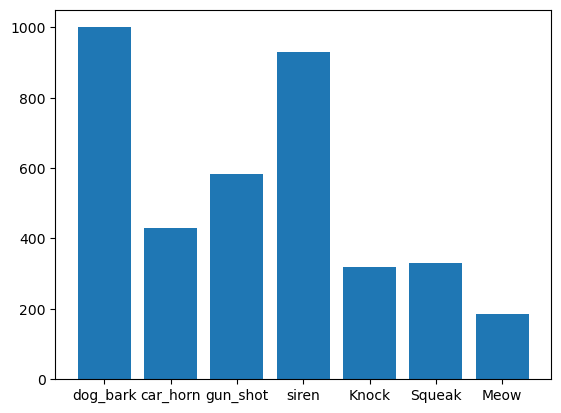

184

In [82]:
data = featuresdf.values
y = data[:, -1]

def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%s, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()
    
    return v

X, y = data[:, :-1], data[:, -1]

count_and_plot(y)

In [85]:
dog=0
car=0
gun=0
siren=0
for idx, class_name in enumerate(featuresdf['class']):
    if(class_name=='dog_bark'):
        if(dog==600):
            continue
        else:
            featuresdf = featuresdf.drop(idx, axis=0)
            dog=dog+1
        
    elif(class_name=='gun_shot'):
        if(gun==184):
            continue
        else:
            featuresdf = featuresdf.drop(idx, axis=0)
            gun=gun+1
        
    elif(class_name=='car_horn'):
        if(car==29):
            continue
        else:
            featuresdf = featuresdf.drop(idx, axis=0)
            car=car+1
        
    elif(class_name=='siren'):
        if(siren==529):
            continue
        else:
            featuresdf = featuresdf.drop(idx, axis=0)
            siren=siren+1

Class=car_horn, n=400 (16.454%)
Class=gun_shot, n=400 (16.454%)
Class=siren, n=400 (16.454%)
Class=dog_bark, n=400 (16.454%)
Class=Knock, n=318 (13.081%)
Class=Squeak, n=329 (13.534%)
Class=Meow, n=184 (7.569%)


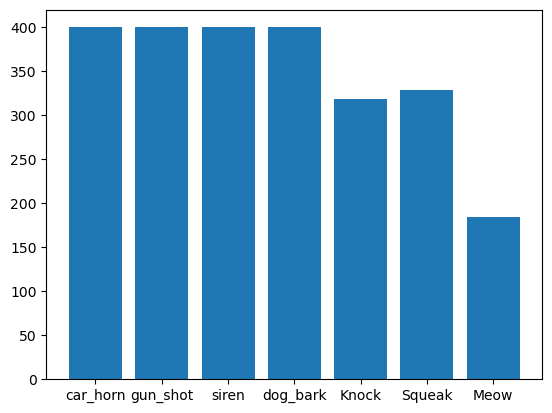

184

In [97]:
data = featuresdf.values
y = data[:, -1]

X, y = data[:, :-1], data[:, -1]

count_and_plot(y)

In [113]:
featuresdf.to_csv('label.csv')

In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd


# Pandas로 저장된 각 열을 np.array로 반환
# X는 MFCC의 데이터
X = np.array(featuresdf.feature.tolist())
# Y는 그 데이터의 Label이 저장됨
y = np.array(featuresdf['class'].tolist())

# Tensorflow에 Label이 사용될 수 있도록 Label을 숫자로 인코딩 해준다.
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

# Test 데이터와 Train 데이터로 2:8로 나눈다.(셔플값이 디폴트이기 때문에 굳이 설정안해도 됨)
x_train, x_val, y_train, y_val = train_test_split(X, yy, test_size=0.1, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.12222, random_state=1)

In [114]:
print(yy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [25]:
num_rows = 40
num_columns = 1287
num_channels = 1

print("train data shape")
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)
x_val = x_val.reshape(x_val.shape[0], num_rows, num_columns, num_channels)

print("\ntrain data reshape 결과")
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

train data shape
(1919, 40, 1287)
(268, 40, 1287)
(244, 40, 1287)

train data reshape 결과
(1919, 40, 1287, 1)
(268, 40, 1287, 1)
(244, 40, 1287, 1)


In [26]:
featuresdf

,feature,class
379,"[[-411.6197, -430.3545, -450.89233, -437.59003...",car_horn
380,"[[-538.7694, -510.07672, -509.86484, -514.6317...",car_horn
381,"[[-484.21603, -449.6978, -445.05435, -449.8618...",car_horn
382,"[[-276.87933, -272.8647, -276.40714, -272.6222...",car_horn
497,"[[-215.34464, -201.1755, -200.10521, -177.5520...",car_horn
...,...,...
3768,"[[-451.74222, -451.4906, -455.80975, -453.5379...",Squeak
3769,"[[42.770367, 77.37165, 56.01426, 69.34931, 79....",gun_shot
3770,"[[-491.79974, -396.00818, -225.93456, -190.135...",Knock
3771,"[[109.82675, 125.85253, 99.86116, 110.499954, ...",gun_shot


In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,Convolution2D, MaxPool2D, GlobalAveragePooling2D, Dropout,LeakyReLU
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from sklearn import metrics

num_labels = yy.shape[1]
filter_size = 2

# HyperParameter
EPOCHS = 200
BATCH_SIZE = 512
MODEL_SAVE = "./Saved Model"
if not os.path.exists(MODEL_SAVE):
    os.mkdir(MODEL_SAVE)
checkpoint = ModelCheckpoint(filepath="{}/Weight_best5.hdf5".format(MODEL_SAVE), monitor="val_loss",
                             verbose=1, save_best_only=True)
ealrystopping = EarlyStopping(monitor="val_loss", patience=20)

#CNN모델 구현
model = Sequential([
    Conv2D(16, 4, padding="same", input_shape=(num_rows, num_columns, num_channels), activation=LeakyReLU(0.1)),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(32, 1, activation="relu"),
    Conv2D(64, 2, activation="relu"),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(128, 4, activation=LeakyReLU(0.1)),
    MaxPool2D(),
    Dropout(0.2),
    GlobalAveragePooling2D(),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(1024, activation="relu"),
    Dropout(0.2),
    Dense(num_labels, activation="softmax")])



#컴파일
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')  
model.summary()
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_val, y_val),
          callbacks=[checkpoint, ealrystopping], verbose=1)

score = model.evaluate(x_test, y_test, verbose = 1)
accuracy = 100 * score[1]

print('Pre-training accuracy: %.4f%%' % accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 1287, 16)      272       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 643, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 643, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 643, 32)       544       
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 642, 64)       8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 321, 64)       0         
 2D)                                                    

2022-10-01 01:07:59.520198: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4/4 [==============================] - ETA: 0s - loss: 2.0266 - accuracy: 0.1803 
Epoch 1: val_loss improved from inf to 1.87366, saving model to ./Saved Model/Weight_best5.hdf5
4/4 [==============================] - 69s 17s/step - loss: 2.0266 - accuracy: 0.1803 - val_loss: 1.8737 - val_accuracy: 0.2992
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 1.8506 - accuracy: 0.3408 
Epoch 2: val_loss improved from 1.87366 to 1.79845, saving model to ./Saved Model/Weight_best5.hdf5
4/4 [==============================] - 68s 16s/step - loss: 1.8506 - accuracy: 0.3408 - val_loss: 1.7985 - val_accuracy: 0.2869
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 1.7364 - accuracy: 0.3778 
Epoch 3: val_loss improved from 1.79845 to 1.65078, saving model to ./Saved Model/Weight_best5.hdf5
4/4 [==============================] - 67s 17s/step - loss: 1.7364 - accuracy: 0.3778 - val_loss: 1.6508 - val_accuracy: 0.4057
Epoch 4/200
4/4 [==============================] -

In [ ]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
model = load_model("./Saved Model/Weight_best5.hdf5")
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", round(score[1]*100, 5), "%")
score = model.evaluate(x_val, y_val, verbose=0)
print("Validation Accuracy: ", round(score[1]*100, 5), "%")
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: ", round(score[1]*100, 5), "%")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

2022-10-01 09:51:46.480334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'x_train' is not defined

In [103]:
def print_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)
    
    y_prob = model2.predict(prediction_feature)
    predicted_vector = y_prob.argmax(axis=-1)
    
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 


    predicted_proba_vector = model2.predict(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [104]:
def predict_prob(number):
  return [number[0],1-number[0]]

In [105]:
filename = 'Saved Model/car1.wav'
print_prediction(filename) 

NameError: name 'num_rows' is not defined